In [1]:
import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [2]:
def add_this_up(a_list):
    '''
    adds up elements of the list
    Input:
        a_list = list with all numerical values
    Returns: 
        val = (scalar)
    '''
    val = 0 
    
    for i in a_list:
        val += i 
        
    return val

In [16]:
xmin = 1000
xmax = 200000

time_record = {}

for l in tqdm(range(xmin, xmax, 100)):
    
    # make a list
    my_list = [x for x in range(l)]
    
    #time.sleep(0.01)
    
    starttime = datetime.datetime.now()
    my_sum = add_this_up(my_list)
    endtime = datetime.datetime.now()
    
    time_taken = (endtime - starttime).total_seconds()
    
    time_record[l] = time_taken
    

In [17]:
time_taken_df = pd.DataFrame.from_dict(time_record, orient="index")
time_taken_df.reset_index(inplace=True)

In [18]:
time_taken_df.rename(columns={0:"time_taken", 'index': "list_size"}, inplace=True)
time_taken_df.head(3)

,list_size,time_taken
0,1000,0.000076
1,1100,0.000050
2,1200,0.000054


Text(0.5, 1.0, 'Time (in sec) to access add all values from a list')

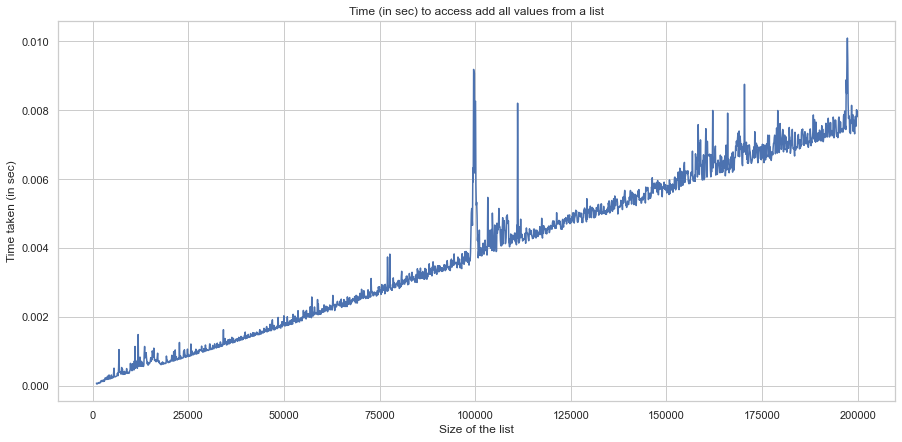

In [20]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns_plot  = sns.lineplot(x="list_size", y="time_taken", data=time_taken_df, palette="Blues_d")
sns_plot.set(xlabel="Size of the list", ylabel="Time taken (in sec)")
#sns_plot.set(ylim=(0,0.01)) # to make the linear relationship a bit clearer 
sns_plot.set_title("Time (in sec) to access add all values from a list")

### As expected this is O(n) operation.

In [21]:
# how about using python build it sum operator 

xmin = 1000
xmax = 200000

time_record_2 = {}

for l in tqdm(range(xmin, xmax, 100)):
    
    # make a list
    my_list = [x for x in range(l)]
    
    #time.sleep(0.01)
    
    starttime = datetime.datetime.now()
    my_sum = sum(my_list)
    endtime = datetime.datetime.now()
    
    time_taken = (endtime - starttime).total_seconds()
    
    time_record_2[l] = time_taken

In [26]:
time_taken_2_df = pd.DataFrame.from_dict(time_record_2, orient="index")
time_taken_2_df.reset_index(inplace=True)

time_taken_2_df.rename(columns={0:"time_taken", 'index': "list_size"}, inplace=True)
time_taken_2_df.head(3)

,list_size,time_taken
0,1000,0.000012
1,1100,0.000012
2,1200,0.000014


Text(0.5, 1.0, 'Time (in sec) to access add all values from a list (sum operator)')

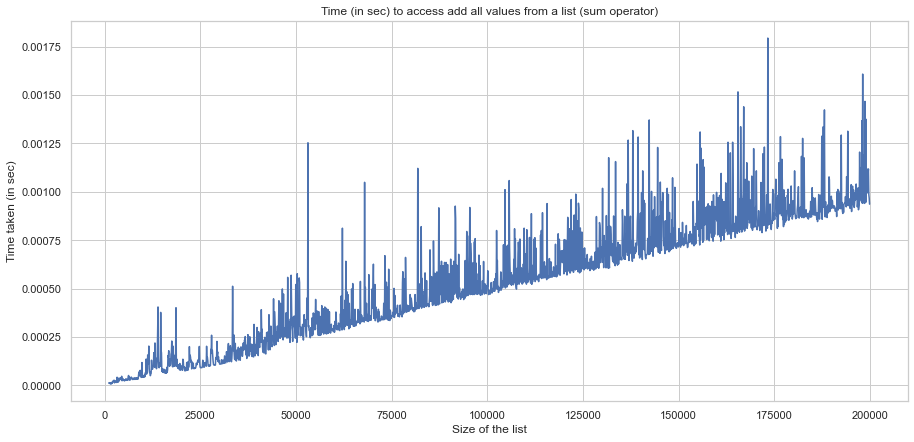

In [27]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns_plot  = sns.lineplot(x="list_size", y="time_taken", data=time_taken_2_df, palette="Blues_d")
sns_plot.set(xlabel="Size of the list", ylabel="Time taken (in sec)")
#sns_plot.set(ylim=(0,0.01)) # to make the linear relationship a bit clearer 
sns_plot.set_title("Time (in sec) to access add all values from a list (sum operator)")

## Conclusion: adding elements of a list is an O(n) operarion. Of course!
# /fin. 